<a href="https://colab.research.google.com/github/Betanode/harami_BS_krlenge/blob/main/GAN_STOCK_PRICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [1]:
import torch
import torch.nn as NN
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
#PyTorch Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data

In [52]:
data = pd.read_csv('NFTY_26Jun.csv')

In [53]:
print(data.head())
print(data.size)

         DATE  EXPIRY DATE  OPTION TYPE  STRIKE PRICE   OPEN PRICE   \
0  26-Jun-2025  26-Jun-2025           CE     24,500.00        779.0   
1  25-Jun-2025  26-Jun-2025           CE     24,500.00        659.2   
2  24-Jun-2025  26-Jun-2025           CE     24,500.00        652.0   
3  23-Jun-2025  26-Jun-2025           CE     24,500.00        535.7   
4  20-Jun-2025  26-Jun-2025           CE     24,500.00        398.6   

  HIGH PRICE   LOW PRICE  CLOSE PRICE  LAST PRICE  SETTLE PRICE     Volume   \
0    1,060.00      770.30     1,049.30    1,049.40     25,549.00   7,71,600   
1      796.15      634.35       752.70      755.80        752.70   8,56,350   
2      857.00      547.65       579.35      598.95        579.35  15,87,600   
3      615.70      378.00       522.75      515.70        522.75  39,90,525   
4      670.55      390.10       647.70      631.00        647.70  43,37,475   

                 VALUE      PREMIUM VALUE  OPEN INTEREST  CHANGE IN OI   
0    19,61,44,29,150.00 

In [54]:
df = data[['DATE ','SETTLE PRICE ']]
df.head()

,DATE,SETTLE PRICE
0,26-Jun-2025,"25,549.00"
1,25-Jun-2025,752.70
2,24-Jun-2025,579.35
3,23-Jun-2025,522.75
4,20-Jun-2025,647.70


In [55]:
print(df.size)

120


In [56]:
data2 = pd.read_csv('Nifty 50 Historical Data.csv')

In [57]:
data2.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,26-06-2025,"25,549.00","25,268.95","25,565.30","25,259.90",428.89M,1.21%
1,25-06-2025,"25,244.75","25,150.35","25,266.80","25,125.05",260.58M,0.80%
2,24-06-2025,"25,044.35","25,179.90","25,317.70","24,999.70",450.19M,0.29%
3,23-06-2025,"24,971.90","24,939.75","25,057.00","24,824.85",248.53M,-0.56%
4,20-06-2025,"25,112.40","24,787.65","25,136.20","24,783.65",574.65M,1.29%


In [58]:
dc = data2.drop(['Date','Price'], axis=1)
print(dc.head())
print(dc.size)

        Open       High        Low     Vol. Change %
0  25,268.95  25,565.30  25,259.90  428.89M    1.21%
1  25,150.35  25,266.80  25,125.05  260.58M    0.80%
2  25,179.90  25,317.70  24,999.70  450.19M    0.29%
3  24,939.75  25,057.00  24,824.85  248.53M   -0.56%
4  24,787.65  25,136.20  24,783.65  574.65M    1.29%
390


In [69]:
data['DATE ']=pd.to_datetime(data['DATE '], dayfirst=True)
data['EXPIRY DATE '] = pd.to_datetime(data['EXPIRY DATE '], dayfirst=True)
data = data.drop(['OPTION TYPE '], axis=1)

In [70]:
data

,DATE,EXPIRY DATE,STRIKE PRICE,OPEN PRICE,HIGH PRICE,LOW PRICE,CLOSE PRICE,LAST PRICE,SETTLE PRICE,Volume,VALUE,PREMIUM VALUE,OPEN INTEREST,CHANGE IN OI
0,2025-06-26,2025-06-26,"24,500.00",779.00,"1,060.00",770.30,"1,049.30","1,049.40","25,549.00","7,71,600","19,61,44,29,150.00","71,02,29,150.00","8,18,625","-2,68,950"
1,2025-06-25,2025-06-26,"24,500.00",659.20,796.15,634.35,752.70,755.80,752.70,"8,56,350","21,60,27,61,278.75","62,21,86,278.75","10,87,575","-2,73,675"
2,2025-06-24,2025-06-26,"24,500.00",652.00,857.00,547.65,579.35,598.95,579.35,"15,87,600","39,98,19,34,601.25","1,08,57,34,601.25","13,61,250","-38,475"
3,2025-06-23,2025-06-26,"24,500.00",535.70,615.70,378.00,522.75,515.70,522.75,"39,90,525","99,64,09,74,228.75","1,87,31,11,728.75","13,99,725","-2,08,500"
4,2025-06-20,2025-06-26,"24,500.00",398.60,670.55,390.10,647.70,631.00,647.70,"43,37,475","1,08,56,50,21,683.75","2,29,68,84,183.75","16,08,225","-1,99,575"
5,2025-06-19,2025-06-26,"24,500.00",410.30,450.00,356.35,392.50,374.80,392.50,"20,23,050","50,39,06,69,831.25","82,59,44,831.25","18,07,800","1,96,950"
6,2025-06-18,2025-06-26,"24,500.00",471.85,547.05,394.90,420.50,410.25,420.50,"14,83,200","37,00,62,31,522.50","66,78,31,522.50","16,10,850","89,625"
7,2025-06-17,2025-06-26,"24,500.00",585.05,585.05,446.00,462.60,458.05,462.60,"11,45,025","28,61,06,60,178.75","55,75,47,678.75","15,21,225","-97,650"
8,2025-06-16,2025-06-26,"24,500.00",406.00,604.00,404.00,585.70,585.00,585.70,"17,34,750","43,37,99,51,471.25","87,85,76,471.25","16,18,875","-1,01,400"
9,2025-06-13,2025-06-26,"24,500.00",350.05,439.70,338.90,406.05,408.75,406.05,"42,94,800","1,06,88,94,27,566.25","1,66,68,27,566.25","17,20,275","4,57,050"


In [71]:
dc['Change'] = dc['Change %'].str.rstrip('%').astype(float)
dc.drop(['Change %'], axis=1)

,Open,High,Low,Vol.,Change
0,"25,268.95","25,565.30","25,259.90",428.89,1.21
1,"25,150.35","25,266.80","25,125.05",260.58,0.80
2,"25,179.90","25,317.70","24,999.70",450.19,0.29
3,"24,939.75","25,057.00","24,824.85",248.53,-0.56
4,"24,787.65","25,136.20","24,783.65",574.65,1.29
...,...,...,...,...,...
73,"22,508.65","22,633.80","22,464.75",289.77,0.03
74,"22,476.35","22,556.45","22,245.85",372.08,0.93
75,"22,073.05","22,394.90","22,067.80",305.94,1.15
76,"21,974.45","22,105.05","21,964.60",253.26,-0.17


In [72]:
dc['Vol.'] = dc['Vol.'].astype(str).str.rstrip('M').astype(float)

In [73]:
dc

,Open,High,Low,Vol.,Change %,Change
0,"25,268.95","25,565.30","25,259.90",428.89,1.21%,1.21
1,"25,150.35","25,266.80","25,125.05",260.58,0.80%,0.80
2,"25,179.90","25,317.70","24,999.70",450.19,0.29%,0.29
3,"24,939.75","25,057.00","24,824.85",248.53,-0.56%,-0.56
4,"24,787.65","25,136.20","24,783.65",574.65,1.29%,1.29
...,...,...,...,...,...,...
73,"22,508.65","22,633.80","22,464.75",289.77,0.03%,0.03
74,"22,476.35","22,556.45","22,245.85",372.08,0.93%,0.93
75,"22,073.05","22,394.90","22,067.80",305.94,1.15%,1.15
76,"21,974.45","22,105.05","21,964.60",253.26,-0.17%,-0.17


In [74]:
fd2 = dc.drop(['Change %'] , axis=1)

In [75]:
fd2

,Open,High,Low,Vol.,Change
0,"25,268.95","25,565.30","25,259.90",428.89,1.21
1,"25,150.35","25,266.80","25,125.05",260.58,0.80
2,"25,179.90","25,317.70","24,999.70",450.19,0.29
3,"24,939.75","25,057.00","24,824.85",248.53,-0.56
4,"24,787.65","25,136.20","24,783.65",574.65,1.29
...,...,...,...,...,...
73,"22,508.65","22,633.80","22,464.75",289.77,0.03
74,"22,476.35","22,556.45","22,245.85",372.08,0.93
75,"22,073.05","22,394.90","22,067.80",305.94,1.15
76,"21,974.45","22,105.05","21,964.60",253.26,-0.17


In [76]:
joined_df = data.join(fd2)
joined_df.head()

,DATE,EXPIRY DATE,STRIKE PRICE,OPEN PRICE,HIGH PRICE,LOW PRICE,CLOSE PRICE,LAST PRICE,SETTLE PRICE,Volume,VALUE,PREMIUM VALUE,OPEN INTEREST,CHANGE IN OI,Open,High,Low,Vol.,Change
0,2025-06-26,2025-06-26,"24,500.00",779.0,"1,060.00",770.30,"1,049.30","1,049.40","25,549.00","7,71,600","19,61,44,29,150.00","71,02,29,150.00","8,18,625","-2,68,950","25,268.95","25,565.30","25,259.90",428.89,1.21
1,2025-06-25,2025-06-26,"24,500.00",659.2,796.15,634.35,752.70,755.80,752.70,"8,56,350","21,60,27,61,278.75","62,21,86,278.75","10,87,575","-2,73,675","25,150.35","25,266.80","25,125.05",260.58,0.80
2,2025-06-24,2025-06-26,"24,500.00",652.0,857.00,547.65,579.35,598.95,579.35,"15,87,600","39,98,19,34,601.25","1,08,57,34,601.25","13,61,250","-38,475","25,179.90","25,317.70","24,999.70",450.19,0.29
3,2025-06-23,2025-06-26,"24,500.00",535.7,615.70,378.00,522.75,515.70,522.75,"39,90,525","99,64,09,74,228.75","1,87,31,11,728.75","13,99,725","-2,08,500","24,939.75","25,057.00","24,824.85",248.53,-0.56
4,2025-06-20,2025-06-26,"24,500.00",398.6,670.55,390.10,647.70,631.00,647.70,"43,37,475","1,08,56,50,21,683.75","2,29,68,84,183.75","16,08,225","-1,99,575","24,787.65","25,136.20","24,783.65",574.65,1.29


In [78]:
from torch.utils.data import TensorDataset , random_split , DataLoader

numeric_df = joined_df.select_dtypes(include = np.number)

tensor_data = torch.tensor(numeric_df.values , dtype = torch.float32)

dataset = TensorDataset(tensor_data)

print(dataset)

In [79]:
train_size = int(0.8* len(dataset))
test_size = len(dataset) - train_size

train_dataset , test_dataset = random_split(dataset, [train_size, test_size])
print(f"Training dataset size: {len(train_dataset)}")
print(f"Testing dataset size: {len(test_dataset)}")

Training dataset size: 48
Testing dataset size: 12


GAN

Epoch 0 | D Loss: 1.4202 | G Loss: 0.8615
Epoch 500 | D Loss: 1.3370 | G Loss: 0.5423
Epoch 1000 | D Loss: 1.4420 | G Loss: 0.6053
Epoch 1500 | D Loss: 1.3863 | G Loss: 0.6927
Epoch 2000 | D Loss: 1.3863 | G Loss: 0.6932
Epoch 2500 | D Loss: 1.3862 | G Loss: 0.6936
Epoch 3000 | D Loss: 1.3839 | G Loss: 0.6937
Epoch 3500 | D Loss: 1.4748 | G Loss: 0.5834
Epoch 4000 | D Loss: 1.4062 | G Loss: 0.6279
Epoch 4500 | D Loss: 1.3837 | G Loss: 0.7453


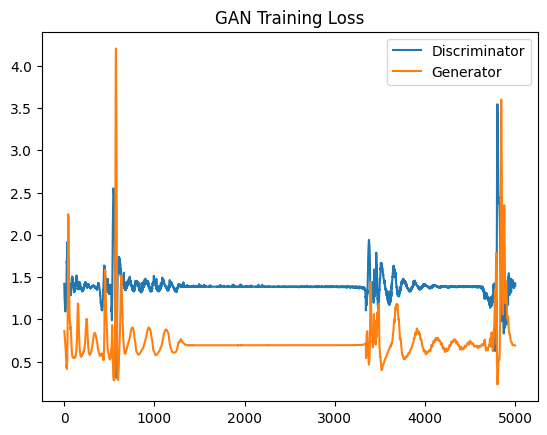

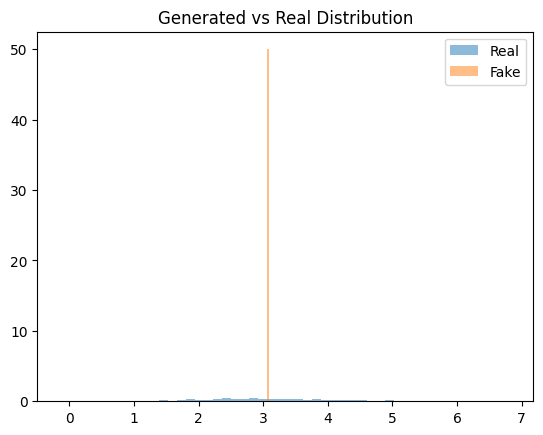

In [6]:

# We won't be using simple GAN for this project, but let's see how GANs work for 1D data

# So here data is created where mean is 3 and std is 1 N(μ=3,σ=1), *a means variance is a, +b means mean is b
def create_real_data(batch_size):
  return torch.randn(batch_size, 1)*1 + 3

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


#Lets make generator
class Generator(NN.Module):
  def __init__(self):
    super(Generator , self).__init__() # We made generator class and we are definig that it is child of NN.Module so fetch all the properties and method of NN.Module
    self.model = NN.Sequential(
        NN.Linear(1, 10),
        NN.ReLU(),
        NN.Linear(10, 10),
        NN.ReLU(),
        NN.Linear(10, 1)
    )
  def forward(self, z):
    return self.model(z)
# And Discriminator
class Descriminator(NN.Module): # We made Dicriminator class and we are definig that it is child of NN.Module so fetch all the properties and method of NN.Module
  def __init__(self):
    super(Descriminator, self).__init__()
    self.model = NN.Sequential(
        NN.Linear(1,14),
        NN.ReLU(),
        NN.Linear(14,1),
        NN.Sigmoid()
    )
  def forward(self, z):
    return self.model(z)

# Start these models
G = Generator().to(device)
D = Descriminator().to(device)

# Loss + Optimizers
criterion = NN.BCELoss()
g_optimizer = optim.Adam(G.parameters(), lr=0.01)
d_optimizer = optim.Adam(D.parameters(), lr=0.01)

# Training loop
epochs = 5000
batch_size = 64

D_losses, G_losses = [], []

for epoch in range(epochs):
    # --- Train Discriminator ---
    real_samples = create_real_data(batch_size).to(device)
    fake_noise = torch.randn(batch_size, 1).to(device)
    fake_samples = G(fake_noise)

    D_real = D(real_samples)
    D_fake = D(fake_samples.detach())

    loss_real = criterion(D_real, torch.ones_like(D_real))
    loss_fake = criterion(D_fake, torch.zeros_like(D_fake))
    d_loss = loss_real + loss_fake

    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()

    # --- Train Generator ---
    fake_noise = torch.randn(batch_size, 1).to(device)
    fake_samples = G(fake_noise)
    D_output = D(fake_samples)

    g_loss = criterion(D_output, torch.ones_like(D_output))  # want D to think fakes are real

    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()

    if epoch % 500 == 0:
        print(f"Epoch {epoch} | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

    D_losses.append(d_loss.item())
    G_losses.append(g_loss.item())

# Plot Losses
plt.plot(D_losses, label="Discriminator")
plt.plot(G_losses, label="Generator")
plt.legend()
plt.title("GAN Training Loss")
plt.show()

# Plot Generated vs Real Data
with torch.no_grad():
    fake_samples = G(torch.randn(1000, 1).to(device)).cpu().numpy()
    real_samples = create_real_data(1000).numpy()

plt.hist(real_samples, bins=50, alpha=0.5, label="Real", density=True)
plt.hist(fake_samples, bins=50, alpha=0.5, label="Fake", density=True)
plt.legend()
plt.title("Generated vs Real Distribution")
plt.show()
